<h3>Регресія з однією незалежною змінною</h3>

У цій і наступних розділах ми навчимося працювати з одномірним регресійним аналізом, який дозволяє перевіряти гіпотези про взаємозв'язок однієї кількісної залежної змінної та кількох незалежних.

Спочатку ми познайомимося з найпростішим варіантом – простою лінійною регресією, за допомогою якої можна досліджувати взаємозв'язок двох змінних. Потім перейдемо до множинної регресії з кількома незалежними змінними.

Лінійна регресія (англ. Linear regression) - використовується в статистиці регресійна модель залежності однієї (пояснюється, залежною) змінної від іншої або кількох інших змінних (факторів, регресорів, незалежних змінних) з лінійною функцією залежності.

У загальному вигляді функція лінійної регресії виглядає як:

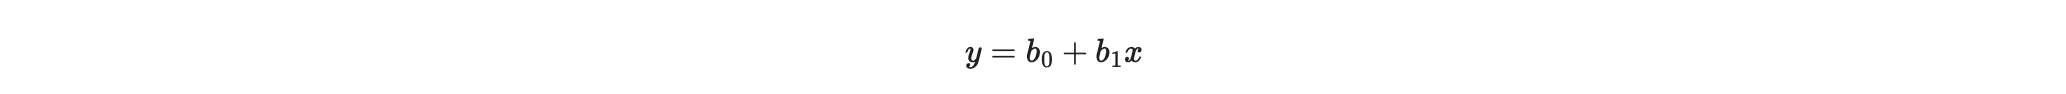

b0 - intercept значение пересечения линии с осью Y

b1 - slope задаёт наклон линии регрессии

строят регрессионную прямую методом наименьших квадратов (МНК)

МНК - это способ нахождения оптимальных параметров линейной регресссии (b0, b1), таких, что сумма квадратов ошибок (остатков) была минимальная.

Расчёт параметров идёт по таким формулам:



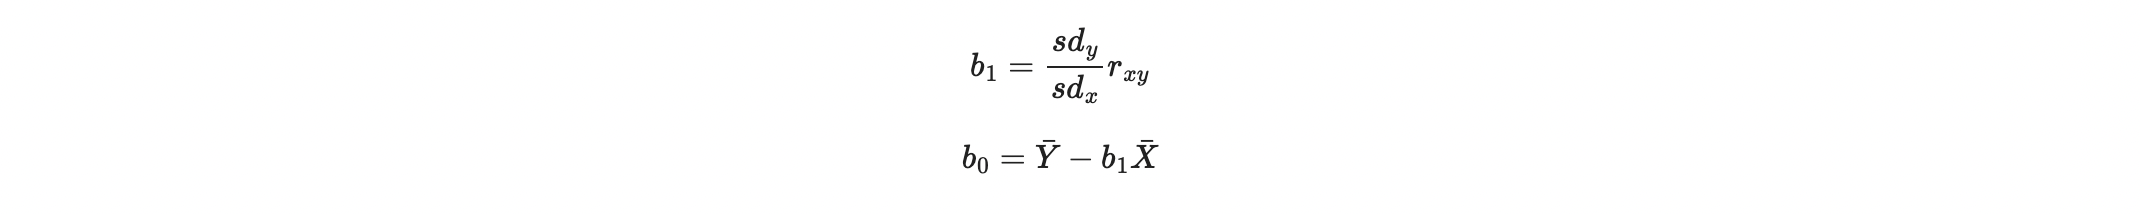

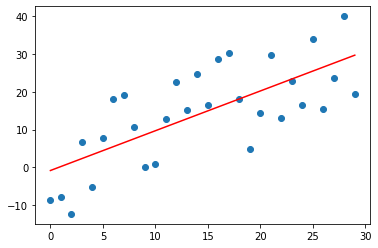

In [6]:
'''Демонстрация работы ковариации и корреляции'''
import numpy as np
import random as r
import matplotlib.pyplot as plt

def cov(x, y):
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum()/(x.size - 1)

def cor(x, y):
    return cov(x, y)/(np.std(x, ddof=1)*np.std(y, ddof=1))

# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else - 1
        res[i] = v + sign*alpha*r.random()*p
    return res

x = np.array(range(30))
y = randomize(x, 0.1)
y1 = randomize(x, 0.5)
y2 = randomize(x, 1)

'''Демонстрація МНК'''
b1 = y1.std()/x.std()*cor(x, y1)
b0 = y1.mean() - b1*x.mean()
f = lambda x: b0 + b1 * x
y_pred = f(x)
plt.scatter(x, y1)
plt.plot(x, y_pred, color='r')
plt.show()